In [1]:
import pandas as pd
import duckdb as db
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Data analyst/projet_data_post_formation/Sample - Superstore.csv", encoding='latin1')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
pd.set_option('display.max_columns', None)
display(data.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Row ID,9994.0,NaN,NaN,NaN,4997.5,2885.163629,1.0,2499.25,4997.5,7495.75,9994.0
Order ID,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,1237,9/5/2016,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,9994,1334,12/16/2015,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9994,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9994,1,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Ship Date']= pd.to_datetime(data['Ship Date'])

In [85]:
q="""

WITH base AS (
  SELECT
    city,
    state,
    region,
    EXTRACT(YEAR FROM "Order Date") AS annee,
    Sales,
    Profit
  FROM data
)
SELECT
  annee,
  region,
  state,
  city,
  ROUND(SUM(Sales),2)  AS CA,
  ROUND(SUM(Profit),2) AS Marge,
  COUNT(DISTINCT city) AS nb_magasin
FROM base
GROUP BY GROUPING SETS (
  (annee, region, state, city),
  (annee, region,state),
  (annee, region),
  (annee),
  ()
)
ORDER BY annee, region, state, city;
"""
dataca=db.sql(q).df()

In [86]:
dataca

,annee,Region,State,City,CA,Marge,nb_magasin
0,2014,Central,Illinois,Aurora,337.14,-252.34,1
1,2014,Central,Illinois,Bloomington,617.70,-407.68,1
2,2014,Central,Illinois,Bolingbrook,9.98,-16.47,1
3,2014,Central,Illinois,Buffalo Grove,831.40,-89.65,1
4,2014,Central,Illinois,Chicago,10834.61,-151.67,1
...,...,...,...,...,...,...,...
1600,2017,West,Washington,Vancouver,9.64,3.66,1
1601,2017,West,Washington,None,65539.90,17256.78,13
1602,2017,West,None,None,250128.37,43808.96,111
1603,2017,None,None,None,733215.26,93439.27,350


In [104]:
q="""

WITH annee_precedente AS (
  SELECT
    annee,
    CA,
    LAG(CA) OVER (ORDER BY annee) AS annee_prec,
    Marge,
    nb_magasin,
    LAG(Marge) OVER (ORDER BY annee) AS marge_annee_prec
  FROM dataca
  WHERE annee IS NOT NULL
    AND City   IS NULL
    AND Region IS NULL
    AND State  IS NULL
)
SELECT
  annee,
  CA,
  ROUND(100 * (CA - annee_prec) / NULLIF(annee_prec, 0), 2) AS prog,
  Marge,
  ROUND(100 * (Marge - marge_annee_prec) / NULLIF(marge_annee_prec, 0), 2) AS prog_marge,
  nb_magasin
FROM annee_precedente
ORDER BY annee;

"""

db.sql(q)

┌───────┬───────────┬────────┬──────────┬────────────┬────────────┐
│ annee │    CA     │  prog  │  Marge   │ prog_marge │ nb_magasin │
│ int64 │  double   │ double │  double  │   double   │   int64    │
├───────┼───────────┼────────┼──────────┼────────────┼────────────┤
│  2014 │  484247.5 │   NULL │ 49543.97 │       NULL │        268 │
│  2015 │ 470532.51 │  -2.83 │  61618.6 │      24.37 │        275 │
│  2016 │  609205.6 │  29.47 │ 81795.17 │      32.74 │        320 │
│  2017 │ 733215.26 │  20.36 │ 93439.27 │      14.24 │        350 │
└───────┴───────────┴────────┴──────────┴────────────┴────────────┘

quel region tire la croissance ?

In [88]:
q="""
WITH annee_precedente AS (
  SELECT
    annee,
    CA,
    Marge,
    nb_magasin,
    COALESCE(Region, 'Total') AS Region,
    LAG(CA)    OVER (PARTITION BY Region ORDER BY annee)  AS ca_annee_prec,
    LAG(Marge) OVER (PARTITION BY Region ORDER BY annee)  AS marge_annee_prec,
    LAG(nb_magasin) OVER (PARTITION BY Region ORDER BY annee) AS nb_mag_prec
  FROM dataca
  WHERE annee IS NOT NULL
    AND City IS NULL
    AND State IS NULL
)

SELECT
  annee,
  Region,
  CA,
  ROUND(100 * CA / SUM(CA) OVER (PARTITION BY annee), 2) AS part_pct,
  ROUND(100 * (CA - ca_annee_prec) / NULLIF(ca_annee_prec, 0), 2) AS prog_pct,
  DENSE_RANK() OVER (PARTITION BY annee ORDER BY prog_pct DESC) AS rank_prog,
  Marge,
  ROUND(100 * Marge/CA, 2) AS pct_marge,
  nb_magasin - nb_mag_prec AS diff_mag,  -- évolution absolue
  ROUND(100 * (nb_magasin - nb_mag_prec) / NULLIF(nb_mag_prec, 0), 2) AS prog_mag -- évolution %
FROM annee_precedente
WHERE Region <> 'Total'
ORDER BY annee, Region;



"""

data_region=db.sql(q).df()

In [89]:
data_region

,annee,Region,CA,part_pct,prog_pct,rank_prog,Marge,pct_marge,diff_mag,prog_mag
0,2014,Central,103838.16,21.44,NaN,1,539.55,0.52,<NA>,NaN
1,2014,East,128680.46,26.57,NaN,1,17059.61,13.26,<NA>,NaN
2,2014,South,103845.84,21.44,NaN,1,11879.12,11.44,<NA>,NaN
3,2014,West,147883.03,30.54,NaN,1,20065.69,13.57,<NA>,NaN
4,2015,Central,102874.22,21.86,-0.93,2,11716.80,11.39,-2,-2.35
5,2015,East,156332.06,33.22,21.49,1,21091.01,13.49,4,6.67
6,2015,South,71359.98,15.17,-31.28,4,8318.59,11.66,2,2.82
7,2015,West,139966.25,29.75,-5.35,3,20492.19,14.64,5,6.41
8,2016,Central,147429.38,24.20,43.31,1,19899.16,13.50,18,21.69
9,2016,East,180685.82,29.66,15.58,4,20141.60,11.15,10,15.63


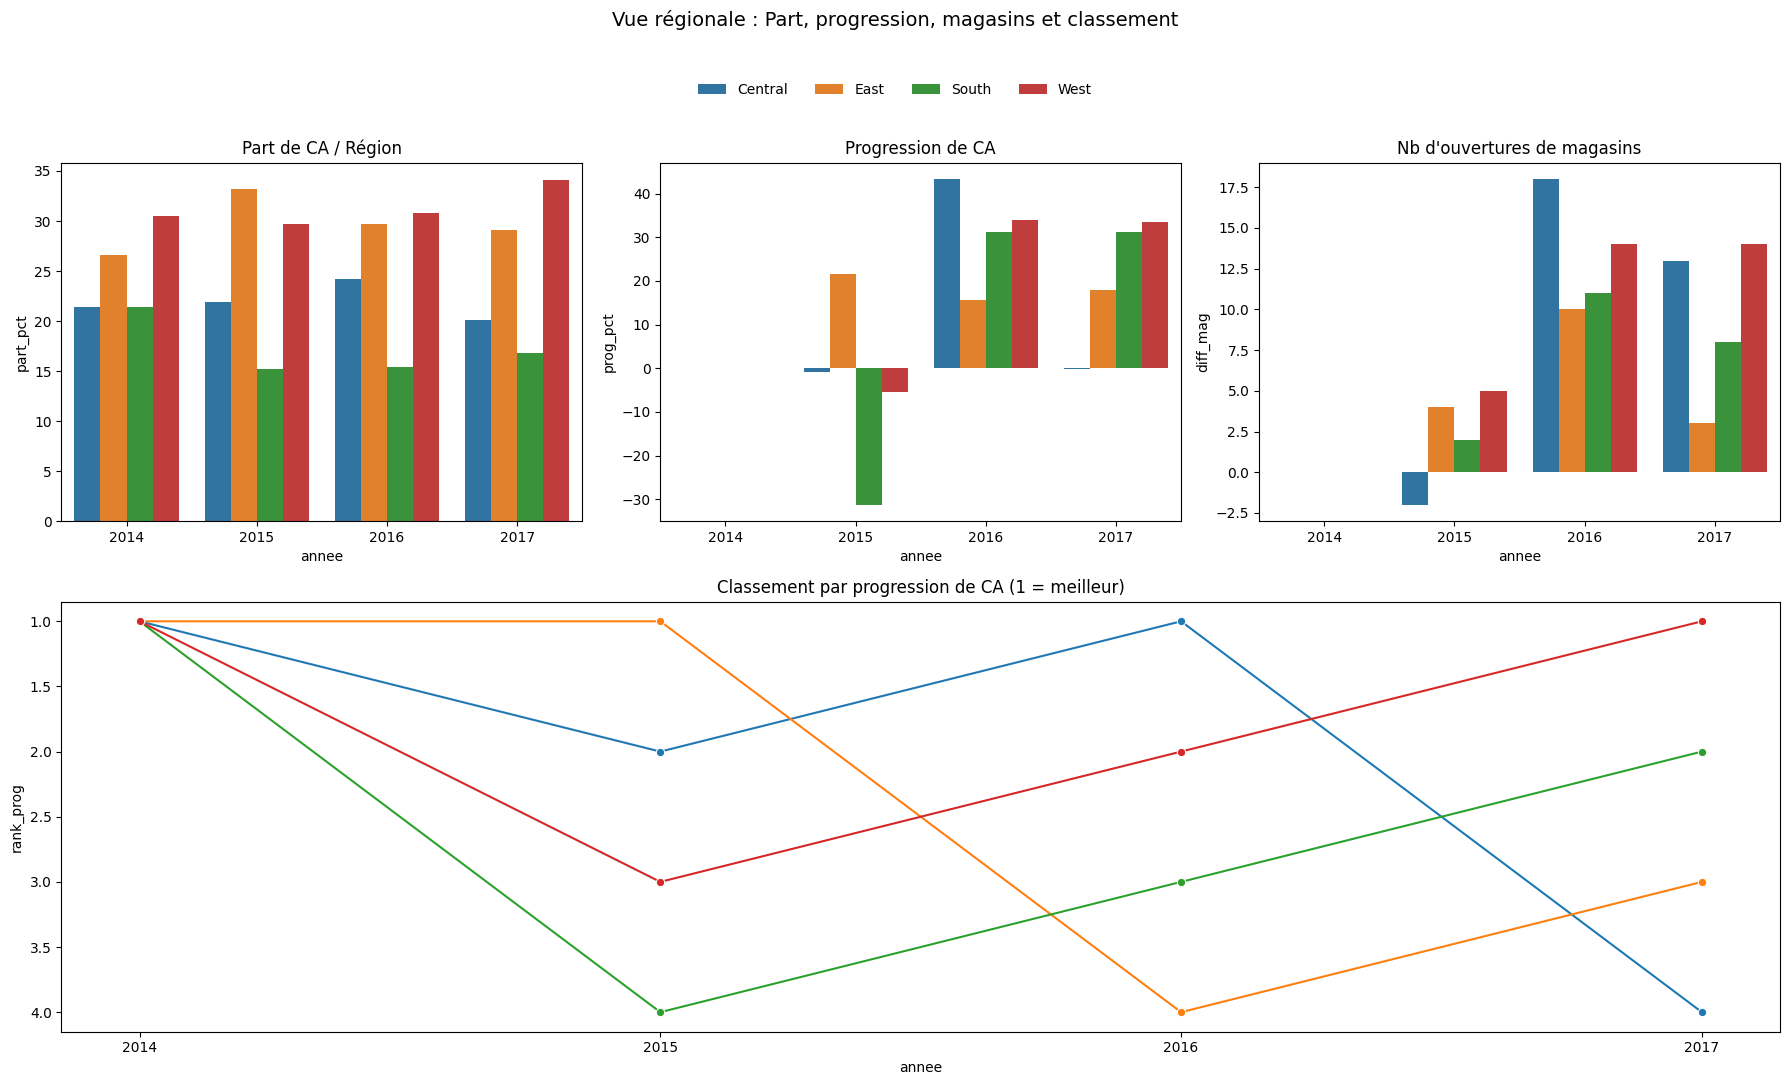

In [114]:
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, height_ratios=[1, 1.2])

# 1. Part de CA (haut gauche)
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=data_region, x='annee', y='part_pct', hue='Region', ax=ax1)
ax1.set_title("Part de CA / Région")
ax1.legend_.remove()

# 2. Progression de CA (haut milieu)
ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(data=data_region, x='annee', y='prog_pct', hue='Region', ax=ax2)
ax2.set_title("Progression de CA")
ax2.legend_.remove()

# 3. Ouvertures de magasins (haut droite)
ax3_top = fig.add_subplot(gs[0, 2])
sns.barplot(data=data_region, x='annee', y='diff_mag', hue='Region', ax=ax3_top)
ax3_top.set_title("Nb d'ouvertures de magasins")
ax3_top.legend_.remove()

# 4. Rank progression (ligne du bas sur toute la largeur)
ax4 = fig.add_subplot(gs[1, :])
sns.lineplot(data=data_region, x='annee', y='rank_prog', hue='Region', marker="o", ax=ax4)
ax4.invert_yaxis()
ax4.set_title("Classement par progression de CA (1 = meilleur)")
ax4.set_xticks(sorted(data_region["annee"].unique()))
ax4.legend_.remove()

# Légende globale (au-dessus)
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',
           ncol=min(6, len(labels)), frameon=False, bbox_to_anchor=(0.5, 1.02))

fig.suptitle("Vue régionale : Part, progression, magasins et classement",
             y=1.08, fontsize=14)
plt.tight_layout()
plt.show()


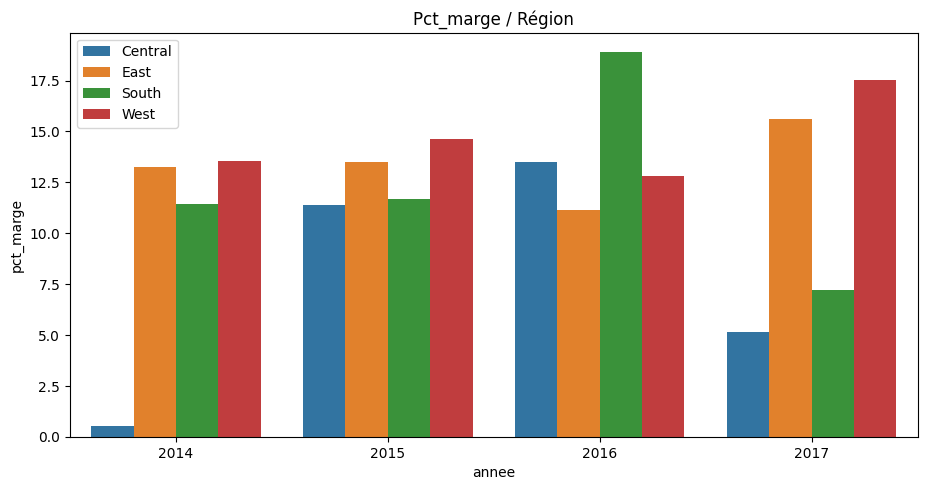

In [115]:
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.2])  # 2 lignes, 2 colonnes

# 1. Part de CA (haut gauche)
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=data_region, x='annee', y='pct_marge', hue='Region', ax=ax1)
ax1.set_title("Pct_marge / Région")
ax1.legend(loc='best')

plt.tight_layout()
plt.show()

Entre 2014 et 2017, le chiffre d’affaires a bien augmenté. Mais cette croissance dépend surtout de deux régions : l’Ouest et l’Est, qui font plus de 60% du total.

L’Ouest est le moteur : il pèse 1/3 du chiffre d’affaires. Meilleur marge en 2017 et en croissance

L’Est est un pilier stable : il représente aussi environ 30%. Bonne marge est en croissance 2017

Le Centre stagne, il ne progresse plus en CA et la marge s'effondre

Le Sud est instable : il a chuté CA, puis a bien rebondi cest 2 derniere années,excellente marge en 2016 mais chute de la marge en 2017

👉 Conclusion business :
Si on veut sécuriser la croissance, il faut protéger le West (ne pas tout miser dessus, est-ce qu'on depend d'un etat en particulier dans cette region ? si, oui possiblité de de progresse dans d'autre état ?), renforcer l’East (notre base solide, quels sont les état a faire progresse en prio ?), et travailler sur le South pour transformer son rebond en vraie dynamique et stabiliser la marge.(comprendre ce qui marche dans les États en croissance et repliquer). Le Central décider si on relance via quelques États cibles et augmenter la marge


## 📊 Bilan global 2014–2017 (CA, marge, ouvertures magasins)

### ✅ Points forts

* **Croissance globale solide** (+66 % de CA en 4 ans) malgré des marges contrastées.
* **West = locomotive** : +70 % de CA, +14 ouvertures nettes, marge qui grimpe de 13,6 % → 17,5 %. Expansion rentable.
* **East = base stable** : +66 % de CA, +3 ouvertures, marge solide (13,3 → 15,6 %). Expansion modérée mais efficace.
* **Sud en rebond** : après le creux de 2015, +72 % de CA en 2017, +8 ouvertures nettes. Reprise prometteuse, à sécuriser.

---

### ❌ Points faibles

* **Central en difficulté** : CA stagnant (+42 % en 2016 mais retombée en 2017), marge effondrée (11,4 % → 5,1 %), +13 ouvertures nettes mais sans effet positif → problème de rentabilité.
* **Concentration** : West + East = >63 % du CA → risque si ces zones ralentissent.
* **Sud instable** : croissance forte mais marges volatiles (18,9 % en 2016 → 7,2 % en 2017). Expansion pas encore sécurisée.

---

### 🎯 Stratégie

1. **West : consolider la locomotive**

   * Rentabilité + croissance + ouvertures = modèle gagnant.
   * Attention à la dépendance à quelques États phares (Californie, Washington).
2. **East : continuer la progression maîtrisée**

   * Poursuivre des ouvertures sélectives dans les États où la marge est la plus forte.
3. **South : transformer le rebond en dynamique durable**

   * Identifier les États porteurs (NC, Georgia, Tennessee).
   * Stabiliser les marges avant d’ouvrir davantage.
4. **Central : arbitrer rapidement**

   * Ouvertures nombreuses mais inefficaces (13 magasins pour marge divisée par 2).
   * Décider : restructurer (fermetures ciblées + rationalisation) ou désinvestir.

---

👉 **Conclusion exécutive** :
La croissance est tirée par le West et l’East, où les ouvertures soutiennent la rentabilité. Le Sud repart mais reste fragile. Le Central est le vrai point noir : il consomme des investissements (magasins) sans retour suffisant. Décision stratégique urgente à prendre sur cette région.

---


🔎 Étape 2 de l’analyse (niveau États)

Ouest (sécuriser)

Vérifier si la croissance dépend surtout de 1 seul État

Identifier les autres États de l’Ouest avec potentiel

Est (consolider)

Repérer les États “leaders” (solides mais matures) vs États “secondaires” (encore du potentiel).

Quels États faire progresser en priorité pour garder la stabilité de l’Est ?

Sud (développer)

Analyser quels États expliquent le rebond depuis 2016.

Comprendre pourquoi certains chutent et d’autres progressent → modèle à répliquer.

Centre (décider)

Identifier si quelques États tirent encore → possibilité de relance ciblée.

Si aucun relais fort → envisager de réduire l’effort sur cette région.

In [123]:
q = """
WITH annee_precedente AS (
  SELECT
    annee,
    ROUND(CA, 2) AS CA,
    State,
    Region,
    Marge,
    nb_magasin,
    LAG(nb_magasin) OVER (PARTITION BY State ORDER BY annee) AS nb_mag_prec,
    LAG(CA) OVER (PARTITION BY State ORDER BY annee) AS ca_prec,
    ROUND(100 * (CA / SUM(CA) OVER (PARTITION BY annee, Region)), 2) AS part_pct,
    DENSE_RANK() OVER (PARTITION BY annee, Region ORDER BY CA DESC) AS rank_ca,
    LAG(Marge) OVER (PARTITION BY State ORDER BY annee) AS marge_prec
  FROM dataca
  WHERE Region IS NOT NULL
    AND annee IS NOT NULL
    AND State IS NOT NULL

)
SELECT
  annee,
  State,
  Region,
  rank_ca,
  CA,
  part_pct,
  CASE
    WHEN ca_prec IS NULL OR ca_prec = 0 THEN NULL
    ELSE ROUND(100 * (CA - ca_prec) / ca_prec, 2)
  END AS prog,
  Marge,
  ROUND(100 * (Marge - marge_prec) / NULLIF(marge_prec, 0), 2) AS prog_marge,
  ROUND(100 * (Marge / NULLIF(CA, 0)), 2) AS marge_pct,
  nb_magasin - nb_mag_prec AS diff_mag,
  ROUND(100 * (nb_magasin - nb_mag_prec) / NULLIF(nb_mag_prec, 0), 2) AS prog_mag
FROM annee_precedente
ORDER BY State, annee;

"""
data_state = db.sql(q).df()
data_state

,annee,State,Region,rank_ca,CA,part_pct,prog,Marge,prog_marge,marge_pct,diff_mag,prog_mag
0,2014,Alabama,South,82,8.96,0.00,-99.55,2.78,-98.84,31.03,0,0.0
1,2014,Alabama,South,25,1918.77,0.92,NaN,558.70,NaN,29.12,<NA>,NaN
2,2014,Alabama,South,20,2231.47,1.07,24804.80,448.65,16038.49,20.11,0,0.0
3,2014,Alabama,South,7,6139.09,2.96,175.11,1250.73,178.78,20.37,3,300.0
4,2014,Alabama,South,23,1979.89,0.95,3.19,240.60,-56.94,12.15,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2017,Wisconsin,Central,114,22.72,0.01,531.11,10.22,490.75,44.98,0,0.0
1580,2017,Wisconsin,Central,125,3.60,0.00,-88.94,1.73,-79.57,48.06,0,0.0
1581,2017,Wisconsin,Central,28,1816.36,0.62,354.15,419.33,191.24,23.09,0,0.0
1582,2016,Wyoming,West,21,1603.14,0.43,0.00,100.20,0.00,6.25,0,0.0


In [119]:
data_state.to_csv("/content/drive/MyDrive/Data analyst/projet_data_post_formation/data_state.csv", index=False, encoding="utf-8")

In [132]:
q = """
WITH annee_precedente AS (
  SELECT
    annee,
    ROUND(CA, 2) AS CA,
    State,
    City,
    Region,
    Marge,
    nb_magasin,
    LAG(nb_magasin) OVER (PARTITION BY City,State,Region ORDER BY annee) AS nb_mag_prec,
    LAG(CA) OVER (PARTITION BY City,State,Region ORDER BY annee) AS ca_prec,
    ROUND(100 * (CA / SUM(CA) OVER (PARTITION BY annee, Region)), 2) AS part_pct,
    LAG(Marge) OVER (PARTITION BY City,State,Region ORDER BY annee) AS marge_prec
  FROM dataca
  WHERE Region IS NOT NULL
    AND annee IS NOT NULL
    AND State IS NOT NULL

)
SELECT
  annee,
  City,
  State,
  Region,
  CA,
  part_pct,
  CASE
    WHEN ca_prec IS NULL OR ca_prec = 0 THEN NULL
    ELSE ROUND(100 * (CA - ca_prec) / ca_prec, 2)
  END AS prog,
  Marge,
  ROUND(100 * (Marge - marge_prec) / NULLIF(marge_prec, 0), 2) AS prog_marge,
  ROUND(100 * (Marge / NULLIF(CA, 0)), 2) AS marge_pct,
  nb_magasin - nb_mag_prec AS diff_mag,
  ROUND(100 * (nb_magasin - nb_mag_prec) / NULLIF(nb_mag_prec, 0), 2) AS prog_mag
FROM annee_precedente
ORDER BY State, annee;

"""
data_city = db.sql(q).df()
data_city

,annee,City,State,Region,CA,part_pct,prog,Marge,prog_marge,marge_pct,diff_mag,prog_mag
0,2014,Florence,Alabama,South,1979.89,0.95,NaN,240.60,NaN,12.15,<NA>,NaN
1,2014,Decatur,Alabama,South,1918.77,0.92,NaN,558.70,NaN,29.12,<NA>,NaN
2,2014,Montgomery,Alabama,South,2231.47,1.07,NaN,448.65,NaN,20.11,<NA>,NaN
3,2014,None,Alabama,South,6139.09,2.96,NaN,1250.73,NaN,20.37,<NA>,NaN
4,2014,Mobile,Alabama,South,8.96,0.00,NaN,2.78,NaN,31.03,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2017,None,Wisconsin,Central,5567.47,1.89,-58.26,1523.08,-59.16,27.36,-5,-45.45
1580,2017,Madison,Wisconsin,Central,1816.36,0.62,17937.34,419.33,9156.73,23.09,0,0.00
1581,2017,Eau Claire,Wisconsin,Central,32.56,0.01,-97.00,8.47,-95.95,26.01,0,0.00
1582,2016,Cheyenne,Wyoming,West,1603.14,0.43,NaN,100.20,NaN,6.25,<NA>,NaN


In [133]:
data_city.to_csv("/content/drive/MyDrive/Data analyst/projet_data_post_formation/data_city.csv", index=False, encoding="utf-8")

In [117]:
data_state_south = data_state[data_state['Region']=='West']
data_state_south

,annee,State,Region,rank_ca,CA,part_pct,prog,Marge,prog_marge,marge_pct,diff_mag,prog_mag
4,2014,Arizona,West,3,8295.24,5.61,NaN,-903.20,NaN,-10.89,<NA>,NaN
5,2015,Arizona,West,3,9611.21,6.87,15.86,236.38,-126.17,2.46,1,11.11
6,2016,Arizona,West,5,6242.02,3.33,-35.05,-1485.11,-728.27,-23.79,-2,-20.00
7,2017,Arizona,West,3,11133.54,4.45,78.36,-1276.00,-14.08,-11.46,2,25.00
12,2014,California,West,1,91303.53,61.74,NaN,12637.95,NaN,13.84,<NA>,NaN
13,2015,California,West,1,88443.84,63.19,-3.13,14371.26,13.72,16.25,4,12.12
14,2016,California,West,1,131551.91,70.17,48.74,20005.72,39.21,15.21,10,27.03
15,2017,California,West,1,146388.34,58.53,11.28,29366.46,46.79,20.06,9,19.15
16,2014,Colorado,West,4,6502.29,4.40,NaN,438.19,NaN,6.74,<NA>,NaN
17,2015,Colorado,West,4,4639.27,3.31,-28.65,-1141.07,-360.41,-24.60,0,0.00


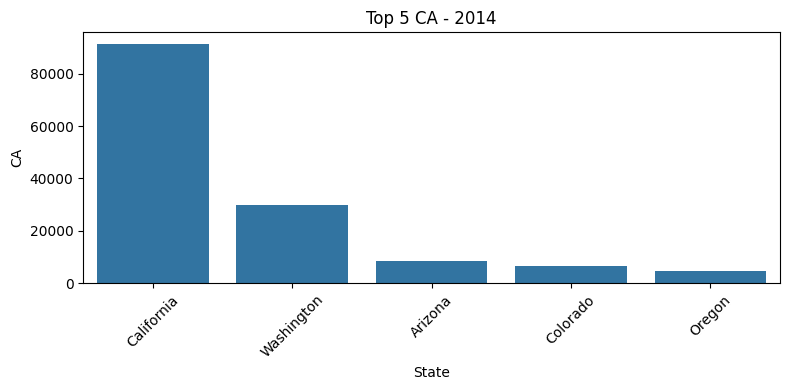

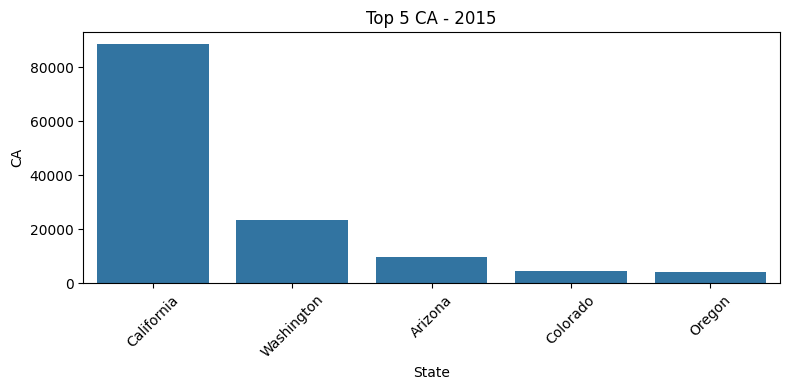

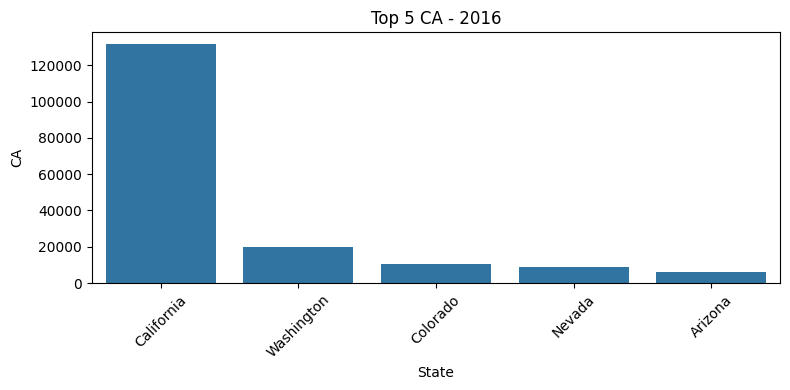

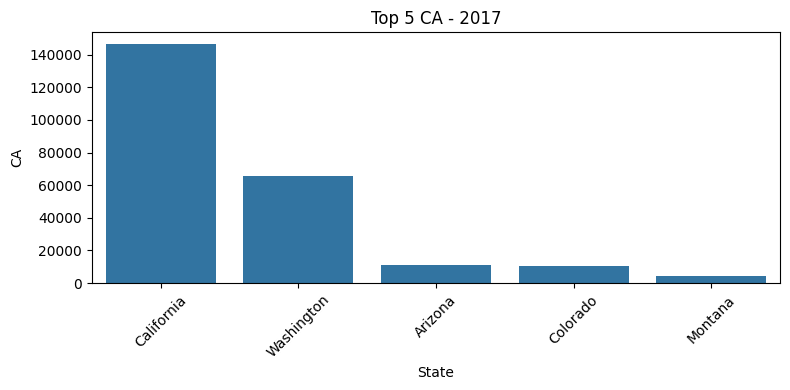

In [94]:
def Top_Flop(df: pd.DataFrame, col: str, n: int = 5, ascending: bool = False) -> pd.DataFrame:
    data_sub=(
        df.sort_values(by=col, ascending=ascending)
        .groupby('annee')
        .head(n)

    )
    years = sorted(data_sub["annee"].unique())
    for year in years:
        plt.figure(figsize=(8,4))
        subset = data_sub[data_sub["annee"] == year]
        sns.barplot(data=subset, x="State", y=col)
        plt.title(f"{'Top' if not ascending else 'Flop'} {n} {col} - {year}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    return data_sub


top5 = Top_Flop(data_state_south, "CA", ascending=False)




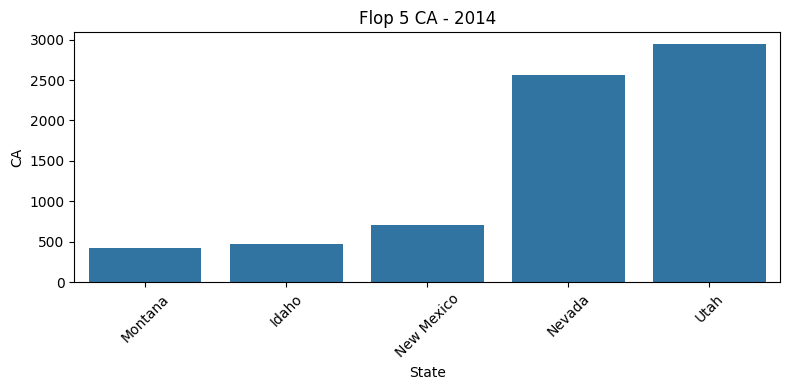

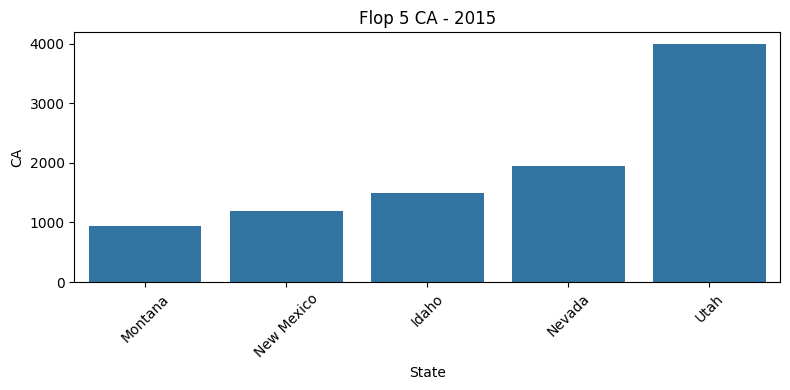

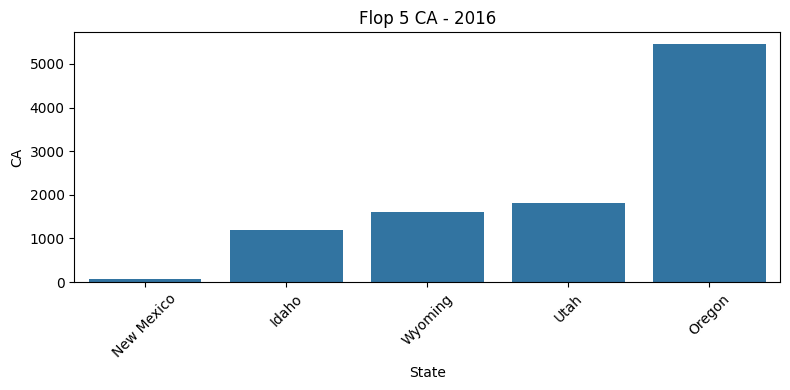

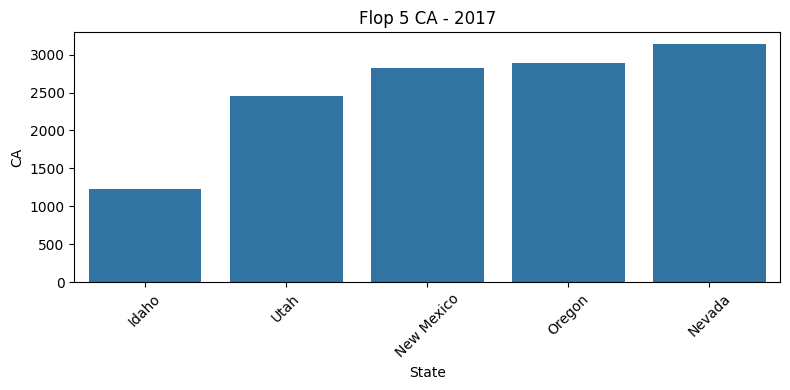

In [95]:
flop5 = Top_Flop(data_state_south, "CA", ascending=True)

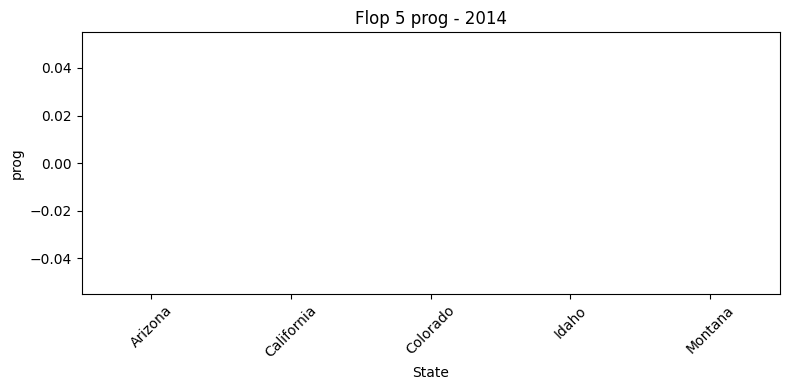

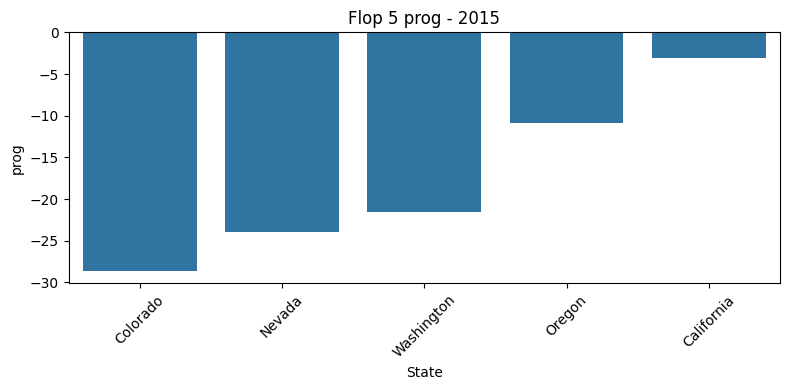

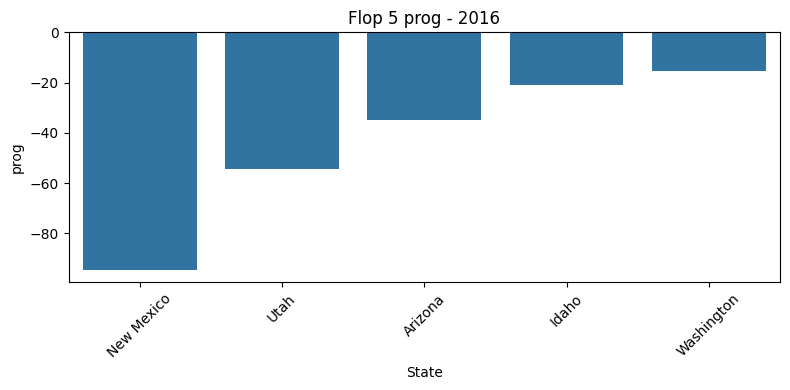

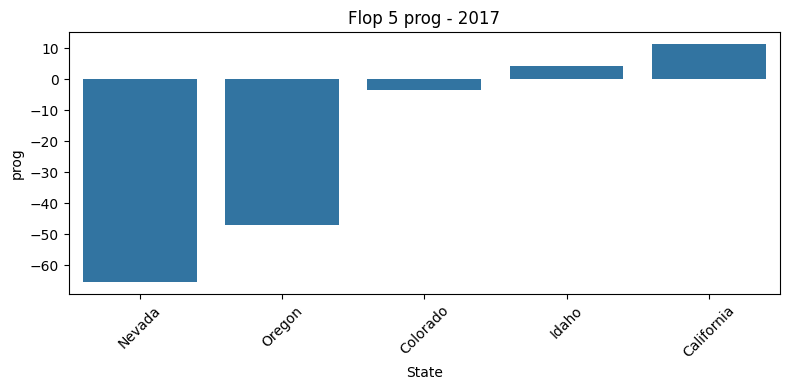

In [96]:
flop5 = Top_Flop(data_state_south, "prog", ascending=True)

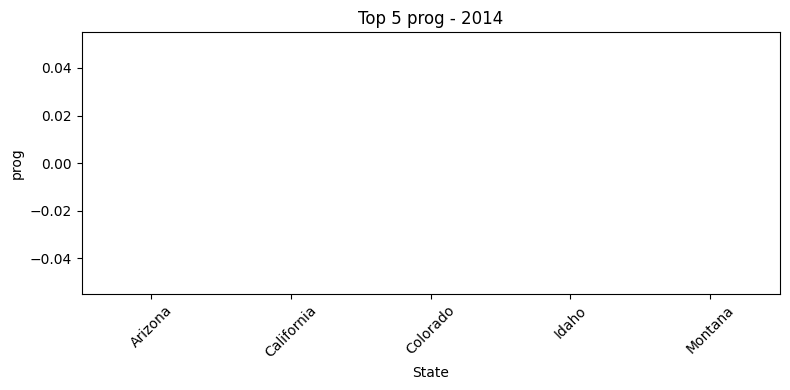

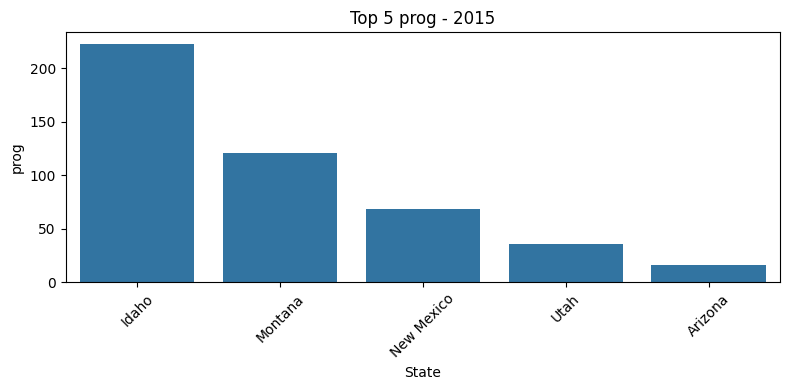

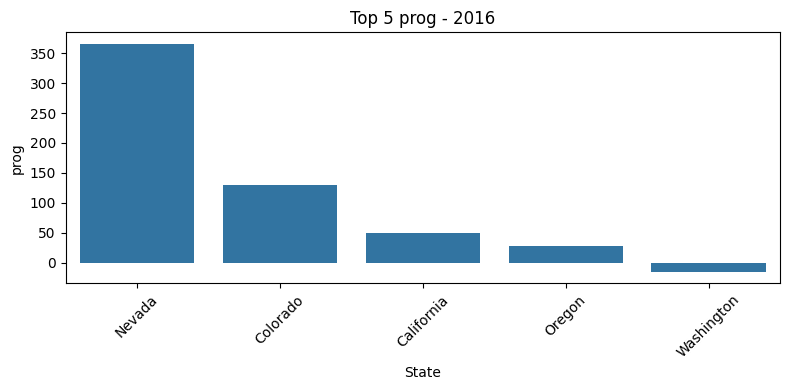

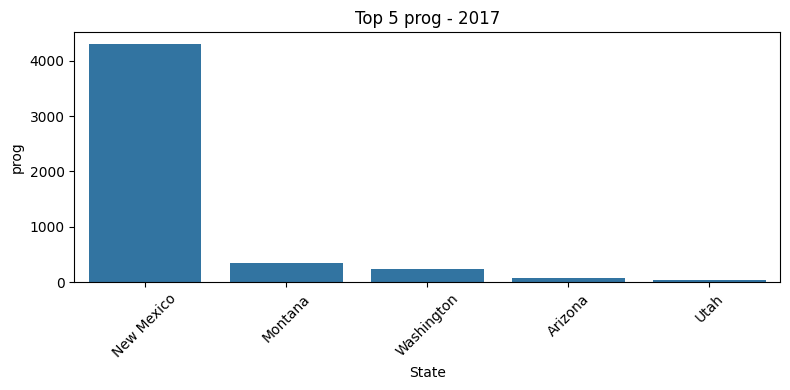

In [97]:
Top5 = Top_Flop(data_state_south, "prog", ascending=False)

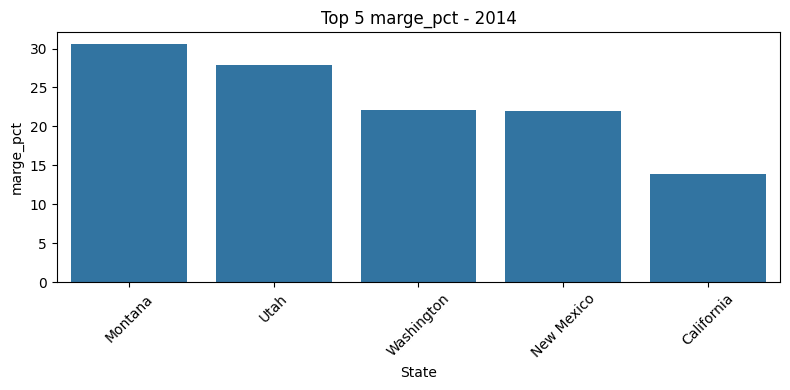

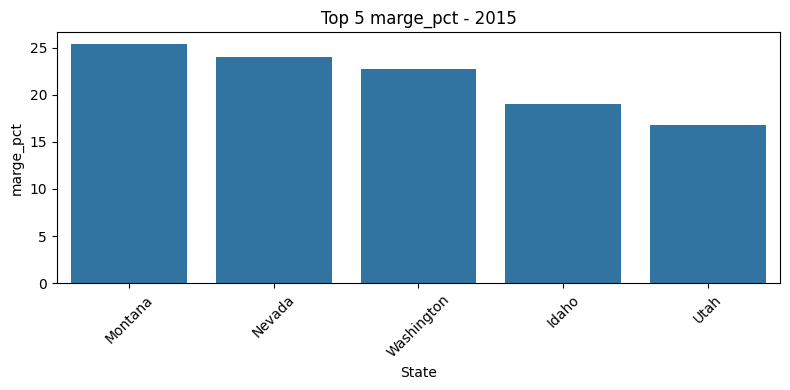

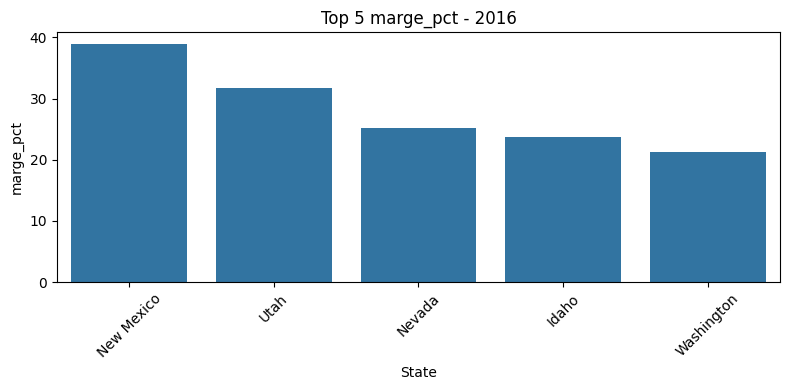

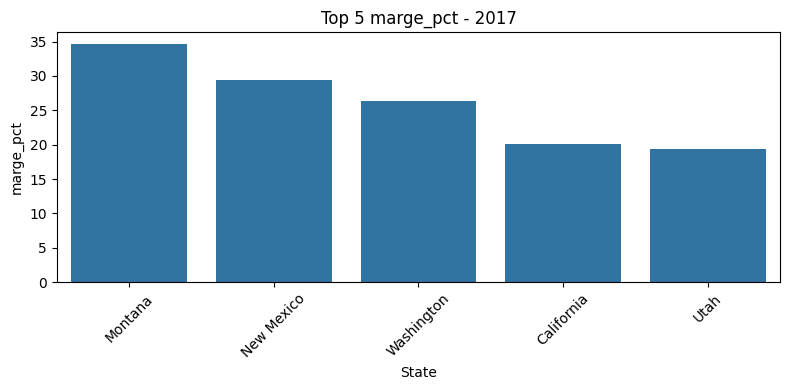

In [98]:
top5 = Top_Flop(data_state_south,"marge_pct",ascending=False)

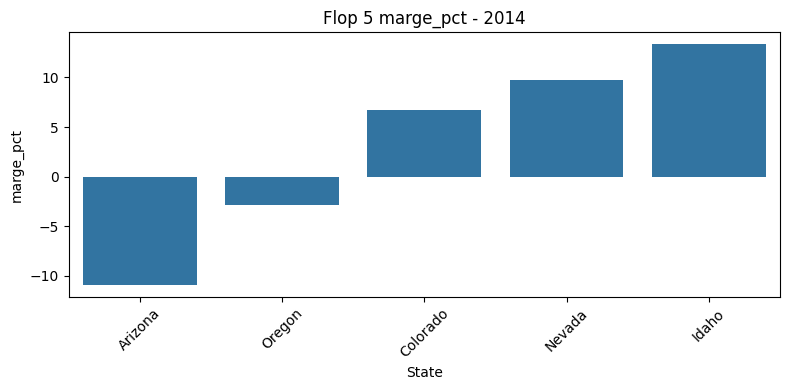

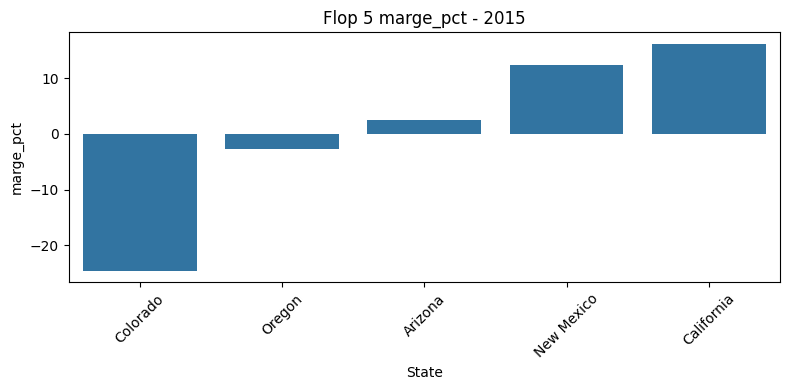

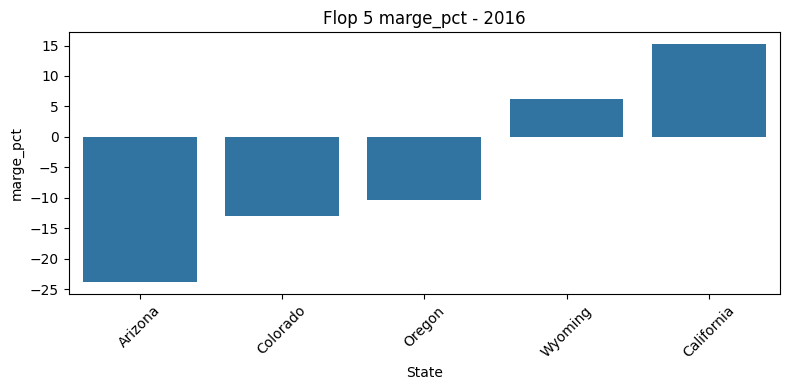

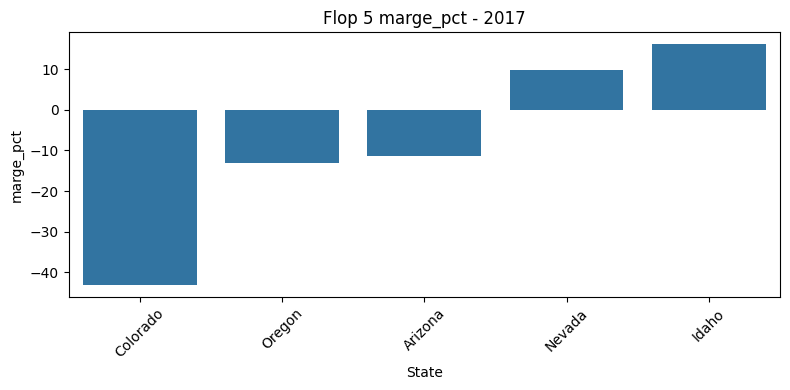

In [99]:
top5 = Top_Flop(data_state_south,"marge_pct",ascending=True)

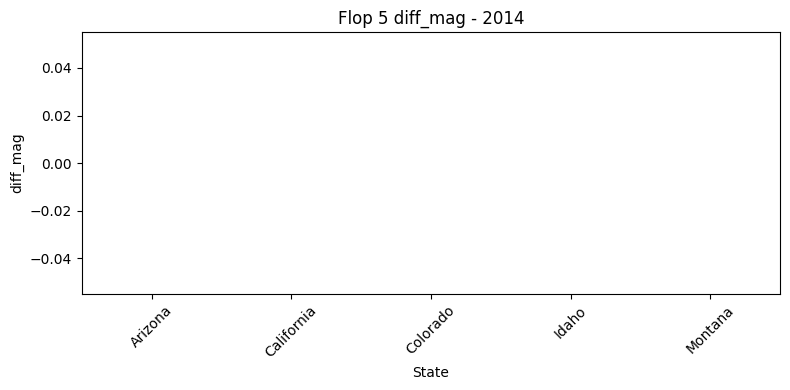

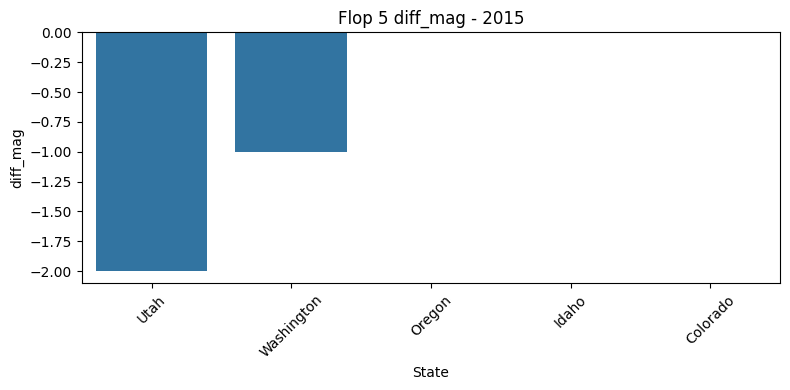

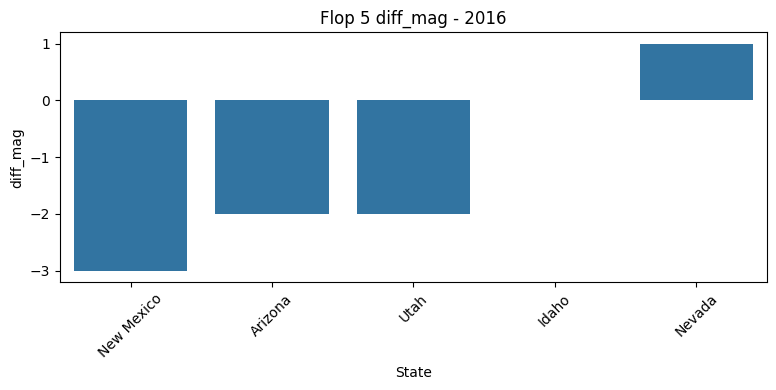

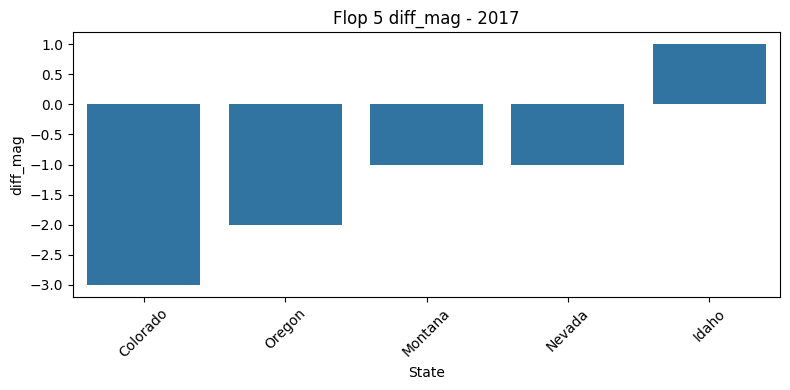

In [101]:
flop5 = Top_Flop(data_state_south, "diff_mag", ascending=True)

📊 Compte-rendu – Région West (2014–2017)
1. Contribution et rôle stratégique

La région West est le moteur national : elle représente ~1/3 du chiffre d’affaires total.

Sa part progresse fortement en 2017 (26% rien que pour l’État de Washington + 20% pour la Californie) → ces deux États dominent la zone.

2. Performance du chiffre d’affaires

Croissance solide sur la période, portée par Californie et Washington :

Californie : leader historique, >50% du CA régional. Après une petite baisse en 2015, elle repart fortement en 2016–2017.

Washington : explosion en 2017 (x3 en CA par rapport à 2016). C’est clairement le relais de croissance récent.

Les autres États pèsent peu individuellement (<5% chacun), avec des trajectoires irrégulières (Nevada, Colorado, Oregon en baisse nette en 2017).

3. Performance de la marge

Tendance globale positive : la marge croît avec le CA, surtout en 2017.

Mais fortes disparités :

Californie : marge élevée et en progression continue (20% en 2017 → record).

Washington : marge solide (26% en 2017), ce qui conforte son rôle de relais stratégique.

États secondaires : marges volatiles, parfois négatives (Arizona, Oregon, Colorado). Ce sont de vrais points faibles → risque d’érosion de rentabilité si on y investit sans stratégie claire.

Nouveau Mexique et Montana : petits volumes mais marges surprenamment hautes en 2016–2017 → niches potentiellement intéressantes.

4. Points forts

✅ Une base solide en Californie (volume + marge).
✅ Relais de croissance puissant en Washington avec CA + marge en forte hausse.
✅ Quelques poches de rentabilité inattendues (Nouveau Mexique, Montana).

5. Points faibles / risques

⚠️ Concentration du CA sur deux États (CA + WA) → risque fort de dépendance.
⚠️ Plusieurs États du West restent instables ou destructeurs de marge (Arizona, Oregon, Colorado).
⚠️ La progression de certains petits États est spectaculaire en % mais sur des volumes faibles → effet “illusion de croissance”.

6. Synthèse pour un directeur

La région West est indispensable pour la croissance nationale.
Mais elle est déséquilibrée : tout repose sur deux piliers (Californie + Washington).
La marge suit la même logique : très rentable sur ces deux États, beaucoup plus fragile ailleurs.

👉 Conclusion business :

Protéger la Californie, moteur historique, et continuer à capitaliser sur sa marge élevée.

Consolider Washington comme nouveau pilier, en sécurisant ce boom (quelles catégories, quels clients expliquent cette croissance ?).

Décider du rôle des petits États : soit on les traite comme relais secondaires (et on investit), soit on accepte qu’ils restent marginaux, mais il faut éviter qu’ils grignotent la rentabilité globale.


Parfait 👍 tu as maintenant le détail de tous les **États de la région West** (2014 → 2017) avec **CA, marge et ouvertures de magasins**. Voici une **analyse complète et structurée** que tu pourrais livrer à ton directeur :

---

## 🔎 Compte rendu – Région West (États)

### 1. États moteurs (forte contribution et croissance)

* **California**

  * Reste **le cœur du business** (≈ 60 % du CA West).
  * Croissance continue du CA (+60 % entre 2014 et 2017).
  * Marge en nette progression (de 13,8 % à 20 %).
  * Forte dynamique d’ouvertures (+9 sur la période).
    👉 **Priorité absolue** : continuer à consolider l’ancrage, surveiller la saturation.

* **Washington**

  * Gros bond en 2017 (+230 % CA, +310 % marge) après plusieurs années de recul.
  * Poids porté à 26 % du CA West.
  * Marges solides (22 → 26 %).
    👉 **État stratégique en croissance** : comprendre le rebond 2017 pour le reproduire.

---

### 2. États intermédiaires (poids moyen mais instables)

* **Arizona**

  * Volatilité extrême : -35 % CA en 2016, puis +78 % en 2017.
  * Marge toujours négative (≈ -10 à -24 %).
    👉 Risque structurel : à surveiller, sinon rationaliser.

* **Colorado**

  * Forte progression en 2016 (+130 % CA) mais rechute en 2017 (-3 %).
  * Marge catastrophique : -24 % → -43 %.
    👉 Beaucoup d’efforts pour peu de rentabilité.

* **Nevada**

  * Pic en 2016 (x4 le CA, marge 25 %) mais effondrement total en 2017 (-65 % CA).
    👉 Opportunité mais très instable : il faut clarifier le modèle.

* **Oregon**

  * CA en recul (-47 % entre 2016 et 2017).
  * Marge durablement négative (-2 à -13 %).
    👉 État déficitaire, peut-être à désinvestir.

---

### 3. Petits États mais dynamiques

* **Montana**

  * Croissance explosive : +352 % CA en 2017.
  * Très forte marge (35 %).
    👉 Petit volume, mais **rendement exceptionnel** → à pousser.

* **New Mexico**

  * Catastrophe en 2016 (quasi zéro CA), mais rebond spectaculaire en 2017 (+4 300 % CA).
  * Marge remontée à 29 %.
    👉 Exemple de **potentiel caché**, mais très volatil.

* **Idaho**

  * Progression modérée mais marge correcte (16 % en 2017).
    👉 Bon relais de croissance secondaire.

* **Utah**

  * Très instable : +35 % CA en 2015, -54 % en 2016, +35 % en 2017.
  * Marge en recul (27 % → 19 %).
    👉 Potentiel présent mais fragile.

* **Wyoming**

  * Très petit marché (CA < 2 000).
  * Marge faible (6 %).
    👉 Non prioritaire.

---

## ✅ Synthèse stratégique West

* **Forces** : California (base stable, croissance + marge), Washington (rebond spectaculaire).
* **Faiblesses** : Colorado et Oregon (fortes pertes malgré volume), Arizona (marge négative chronique).
* **Opportunités** : Montana et New Mexico (très rentables, même si petits marchés).
* **Menaces** : forte instabilité dans Nevada et Utah → attention aux ouvertures non rentables.

---

## 🎯 Recommandations

1. **Consolider California + Washington** = socle solide du West.
2. **Sélectionner des relais** : Montana, New Mexico, Idaho.
3. **Assainir ou réduire l’exposition** à Colorado, Oregon, Arizona (forte destruction de marge).
4. **Revoir le modèle Nevada/Utah** : comprendre pourquoi les pics ne se maintiennent pas.



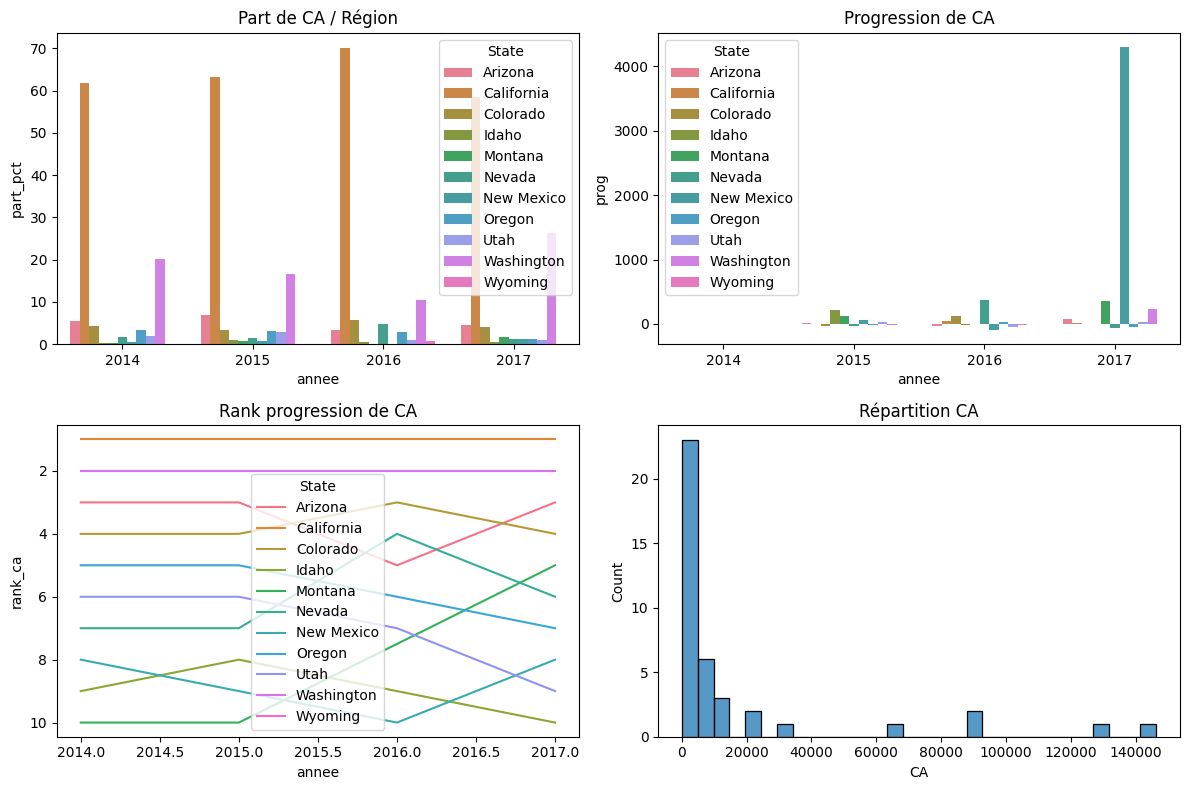

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(data=data_state_south, x='annee', y='part_pct', hue='State', ax=axes[0,0])
axes[0,0].set_title("Part de CA / Région")

sns.barplot(data=data_state_south, x='annee', y='prog', hue='State', ax=axes[0,1])
axes[0,1].set_title("Progression de CA")

sns.lineplot(data=data_state_south, x='annee', y='rank_ca', hue='State', ax=axes[1,0])
axes[1,0].invert_yaxis()
axes[1,0].set_title("Rank progression de CA")

sns.histplot(data_state_south['CA'], ax=axes[1,1])
axes[1,1].set_title("Répartition CA")

plt.tight_layout()
plt.show()

In [26]:
plt.figure(figsize=(20,5))
sns.barplot(data=data_state_tp, x='annee', y='rank_ca', hue='State')
plt.gca().invert_yaxis()
plt.title("Rank progression de CA")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

plt.show()

NameError: name 'data_state_tp' is not defined

<Figure size 2000x500 with 0 Axes>

In [ ]:
data_state[(data_state['annee'] == 2015)]
